In [1]:
from sklearn import tree
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

In [5]:
df1=pd.read_csv('~/Desktop/da_project/csv_file/mldata_binary.csv')
df1.head()


,bath,bed,latitude,logitude,price,size,year built,distance to subway,complaints,10001,...,10030,10031,10032,10034,10036,10037,10038,10039,10044,10065
0,4,6,40.805301,-73.957099,1350000,3264,1901,0.149062,5057,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5,40.802393,-73.957916,3995000,3333,1900,0.174712,5057,0,...,0,0,0,0,0,0,0,0,0,0
2,3,15,40.799701,-73.953697,4000000,3200,1900,0.156687,5057,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,40.805792,-73.956890,975000,923,1901,0.170256,5057,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,40.802101,-73.948799,385000,700,1999,0.053713,5057,0,...,0,0,0,0,0,0,0,0,0,0


(array([1.73359500e-07, 2.77139336e-08, 1.17931632e-08, 5.56899375e-09,
        3.93105441e-09, 1.44138662e-09, 1.50690419e-09, 3.27587868e-10,
        3.27587868e-10, 2.62070294e-10, 1.31035147e-10, 2.62070294e-10,
        2.62070294e-10, 1.31035147e-10, 0.00000000e+00, 6.55175735e-11,
        0.00000000e+00, 0.00000000e+00, 6.55175735e-11, 1.31035147e-10]),
 array([2.99500000e+03, 4.40284525e+06, 8.80269550e+06, 1.32025458e+07,
        1.76023960e+07, 2.20022462e+07, 2.64020965e+07, 3.08019468e+07,
        3.52017970e+07, 3.96016472e+07, 4.40014975e+07, 4.84013478e+07,
        5.28011980e+07, 5.72010482e+07, 6.16008985e+07, 6.60007488e+07,
        7.04005990e+07, 7.48004492e+07, 7.92002995e+07, 8.36001498e+07,
        8.80000000e+07]),
 <a list of 20 Patch objects>)

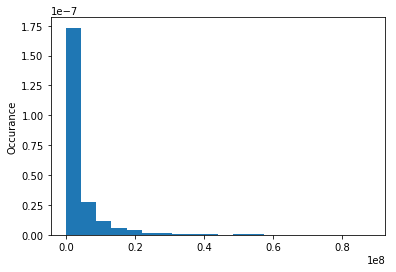

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.ylabel('Occurance');
plt.hist(df1['price'],density=1, bins=20) 

# Random  Forest for all data

In [7]:
# overall data
def model_random_forecast(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain
    rfr = RandomForestRegressor(n_jobs=1, random_state=0)
    param_grid = {'n_estimators': [1000]}
    # 'n_estimators': [1000], 'max_features': [10,15,20,25], 'max_depth':[20,20,25,25,]}
    model = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
    model.fit(X_train, y_train)
    print('Random forecast regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_ 

/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3

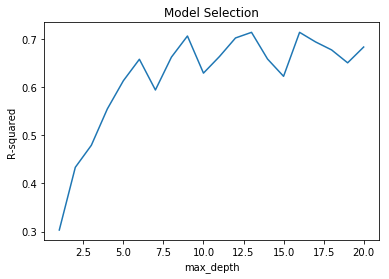

In [8]:
import matplotlib.pyplot as plt 
import numpy as np 
def rcurve(df):
    from sklearn.ensemble import RandomForestRegressor 
    from sklearn.model_selection import train_test_split
    
    train, test = train_test_split(df, test_size = 0.25) #randomize, bc someitmes sorted data
   
    x_train = train.drop(columns=['price'])
    y_train = train['price']
    x_test = test.drop(columns=['price'])
    y_test = test['price']
    mse = np.zeros(20)
    for i in range(1,21):   
        model = RandomForestRegressor(max_depth=i)
        model.fit(x_train,y_train)
        mse[i-1] = model.score(x_test,y_test) 
    return mse
#plt.plot(range(1,21),rcurve(df1),marker='+')
plt.plot(range(1,21),rcurve(df1))
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.title('Model Selection')
plt.show()



/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3

/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3

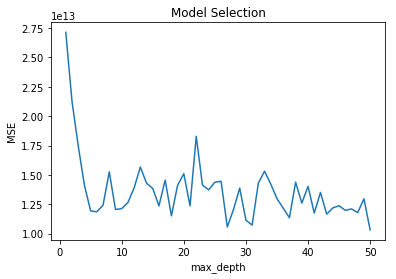

In [9]:
import matplotlib.pyplot as plt 
import numpy as np 
def msecurve(df):

    #df1 includes all features
    train, test = train_test_split(df, test_size = 0.25) #randomize, bc someitmes sorted data   
    x_train = train.drop(columns=['price'])
    y_train = train['price']
    x_test = test.drop(columns=['price'])
    y_test = test['price']
    mse = np.zeros(50)
    for i in range(1,51):   
        model = RandomForestRegressor (max_depth=i)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        msea=sklearn.metrics.mean_squared_error(y_test, y_pred)
        mse[i-1] = msea 
    return mse
#plt.plot(range(1,21),rcurve(df1),marker='+')#includes all feature
plt.plot(range(1,51),msecurve(df1))#include top 9 feautre

plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Model Selection')
plt.show()

In [10]:
train, test = train_test_split(df1, test_size = 0.25) #randomize, bc someitmes sorted data
x_train = train.drop(columns=['price'])
y_train = train['price']
x_test = test.drop(columns=['price'])
y_test = test['price']
model = RandomForestRegressor(max_depth=15)
model.fit(x_train,y_train)
model.score(x_test,y_test) 
y_pred=model.predict(x_test)
mse=sklearn.metrics.mean_squared_error(y_test, y_pred)

print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))
print("MSE",mse)

Training R-Square 0.9368676868492953
Testing R-Square 0.6992837583222754
MSE 15158014144587.906


/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
x_train.head()

,bath,bed,latitude,logitude,size,year built,distance to subway,complaints,10001,10002,...,10030,10031,10032,10034,10036,10037,10038,10039,10044,10065
3419,4,2,40.758830,-73.961694,2400,1975,0.511817,1056,0,0,...,0,0,0,0,0,0,0,0,0,0
3462,1,1,40.757218,-73.961192,206411,1938,0.670195,1056,0,0,...,0,0,0,0,0,0,0,0,0,0
948,2,2,40.749346,-73.969992,215715,1927,0.459955,1800,0,0,...,0,0,0,0,0,0,0,0,0,0
517,4,3,40.764499,-73.974502,3500,1907,0.025615,2675,0,0,...,0,0,0,0,0,0,0,0,0,0
1171,3,3,40.760262,-73.966819,1795,2005,0.201972,1056,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model.fit(x_train,y_train)
importances = model.feature_importances_
im=pd.DataFrame({'importance':importances},index=x_train.columns)
df = im.sort_values('importance', ascending = True)
df.tail()

,importance
year built,0.123686
logitude,0.137870
latitude,0.138425
distance to subway,0.140482
size,0.198437


# Random  Forest for one zone data

In [14]:
#bad performance
df2=pd.read_csv('~/Desktop/da_project/csv_file/zonedata.csv')
df2.head()


,bath,bed,latitude,logitude,price,size,year built,distance to subway,crime
0,11,7,40.766201,-73.970397,67000000,13000,1910,0.211896,1606
1,2,2,40.765154,-73.967956,725000,202841,1927,0.125099,1606
2,4,4,40.762664,-73.964743,11950000,4833,1871,0.108910,1606
3,4,4,40.762874,-73.964476,9950000,4138,1871,0.139596,1606
4,1,1,40.763155,-73.962240,350000,550,1959,0.325530,1606


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

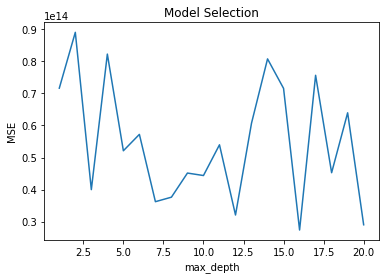

In [15]:
plt.plot(range(1,21),msecurve(df2))#include top 9 feautre

plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Model Selection')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
import sklearn
train, test = train_test_split(df1, test_size = 0.25) #randomize, bc someitmes sorted data
print(test.shape,train.shape)
x_train = train.drop(columns=['price'])
y_train = train['price']
x_test = test.drop(columns=['price'])
y_test = test['price']


from sklearn import linear_model
model3 = linear_model.LinearRegression()
#even if it's a classification probelm, we can do 1vs all technique, threshold
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
# no summary for this model
print("Training R-Square",model3.score(x_train,y_train))
print("Testing R-Square",model3.score(x_test,y_test))
print(sklearn.metrics.mean_squared_error(y_test, y_pred))

(868, 39) (2601, 39)
Training R-Square 0.49880875561387167
Testing R-Square 0.43117639222370563
24027072854147.31


In [17]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train).fit()
model.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     68.94
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:30:38   Log-Likelihood:                -43558.
No. Observations:                2601   AIC:                         8.719e+04
Df Residuals:                    2563   BIC:                         8.742e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.641e+09   1.71e+09     -2.718      0.007   -7.99e+09   -1.29e+09
bath                2.252e+06   8.57e+04     26.287      0.000    2.08e+06    2.42e+06
bed                -4362.6715   9.04e+04     -0.048      0.961   -1.82e+05    1.73e+05
latitude             5.64e+07   3.22e+07      1.754      0.080   -6.66e+06    1.19e+08
logitude           -3.632e+07    2.3e+07     -1.580      0.114   -8.14e+07    8.77e+06
size                  -0.8822      1.024     -0.862      0.389      -2.889       1.125
year built          6252.9782   2357.395      2.652      0.008    1630.386    1.09e+04
distance to subway -6.582e+05   5.61e+05     -1.174      0.240   -1.76e+06    4.41e+05
complaints         -1.336e+05   4.91e+04     -2.721      0.007    -2.3e+05   -3.73e+04
10001               3.701e+08   1.36e+08      2.726      0.006    1.04e+08    6.36e+08
10002               4.599e+08   1.69e+08      2.717      0.007    1.28e+08    7.92e+08
10003               1.661e+08   6.12e+07      2.717      0.007    4.62e+07    2.86e+08
10007              -2.488e+08   9.16e+07     -2.717      0.007   -4.28e+08   -6.92e+07
10009               1.192e+08   4.44e+07      2.686      0.007    3.22e+07    2.06e+08
10011               3.142e+08   1.15e+08      2.727      0.006    8.83e+07     5.4e+08
10012               1.527e+08   5.57e+07      2.740      0.006    4.34e+07    2.62e+08
10013              -1.955e+08   7.22e+07     -2.706      0.007   -3.37e+08   -5.39e+07
10014              -1.628e+08   6.07e+07     -2.684      0.007   -2.82e+08   -4.39e+07
10016              -1.701e+08   6.19e+07     -2.750      0.006   -2.91e+08   -4.88e+07
10017              -1.172e+08   4.26e+07     -2.751      0.006   -2.01e+08   -3.37e+07
10018               3.455e+08   1.27e+08      2.716      0.007    9.61e+07    5.95e+08
10021              -1.866e+08   6.82e+07     -2.736      0.006    -3.2e+08   -5.28e+07
10022              -2.171e+08   7.92e+07     -2.743      0.006   -3.72e+08   -6.19e+07
10023              -1.075e+07    3.4e+06     -3.167      0.002   -1.74e+07   -4.09e+06
10024              -3.411e+08   1.24e+08     -2.746      0.006   -5.85e+08   -9.76e+07
10025              -3.786e+07   1.28e+07     -2.953      0.003    -6.3e+07   -1.27e+07
10026               3.143e+08   1.17e+08      2.690      0.007    8.52e+07    5.44e+08
10027               9.287e+07   3.57e+07      2.604      0.009    2.29e+07    1.63e+08
10028               8.808e+05   1.44e+06      0.613      0.540   -1.94e+06     3.7e+06
10030               2.446e+08   9.15e+07      2.673      0.008    6.51e+07    4.24e+08
10031              -8.318e+07   2.91e+07     -2.855      0.004    -1.4e+08    -2.6e+07
10032               1.756e+08    6.6e+07      2.660      0.008    4.62e+07    3.05e+08
10034               2.395e+08   8.97e+

# predict price range

In [13]:
def fix_price(price):
        try:
            price = int(float(price))
        except:
            return np.NaN
        
        if price < 200000:
            return 0
        elif price>= 200000 and price<= 400000:
            return 1
        elif price>= 400000 and price<= 600000:
            return 2
        elif price>= 600000 and price<= 800000:
            return 3
        elif price>= 800000 and price<= 1000000:
            return 4
        elif price>= 1000000 and price<= 1200000:
            return 5
        elif price>= 1200000 and price<= 1400000:
            return 6
        elif price>= 1400000 and price<= 1600000:
            return 7
        elif price>= 1600000 and price<= 1800000:
            return 8
        elif price>= 1800000 and price<= 2000000:
            return 9
        elif price>= 2000000 and price<= 2200000:
            return 10
        elif price>= 2200000 and price<= 2400000:
            return 11
        elif price>= 2400000 and price<= 2600000:
            return 12
        elif price>= 2600000 and price<= 2800000:
            return 13
        elif price>= 2800000 and price<= 3000000:
            return 14
        elif price>= 3000000 and price<= 4000000:
            return 15
        elif price>= 4000000 and price<= 5000000:
            return 16
        elif price>= 5000000 and price<= 6000000:
            return 17
        elif price>= 6000000 and price<= 7000000:
            return 18
        elif price>= 7000000 and price<= 8000000:
            return 19
        elif price>= 8000000 and price<= 9000000:
            return 20
        elif price>= 9000000 and price<= 10000000:
            return 21
        elif price>= 10000000 and price<= 12000000:
            return 22
        elif price>= 12000000 and price<= 15000000:
            return 23
        elif price>= 15000000 and price<= 17000000:
            return 24
        elif price>= 17000000 and price<= 20000000:
            return 25
        elif price>= 20000000 and price<= 25000000:
            return 26
        elif price>= 25000000 and price<= 30000000:
            return 27
        elif price>= 30000000 and price<= 40000000:
            return 28
        elif price>= 40000000 and price<= 60000000:
            return 29
        else:
            return 30

In [14]:
df1['price'] = df1['price'].astype(int)
df1['price_range'] = df1['price'].apply(fix_price)
df11=df1.drop(columns=['price'])
df11.head()

,bath,bed,latitude,logitude,size,year built,distance to subway,complaints,10001,10002,...,10031,10032,10034,10036,10037,10038,10039,10044,10065,price_range
0,4,6,40.805301,-73.957099,3264,1901,0.149062,5057,0,0,...,0,0,0,0,0,0,0,0,0,6
1,4,5,40.802393,-73.957916,3333,1900,0.174712,5057,0,0,...,0,0,0,0,0,0,0,0,0,15
2,3,15,40.799701,-73.953697,3200,1900,0.156687,5057,0,0,...,0,0,0,0,0,0,0,0,0,15
3,2,2,40.805792,-73.956890,923,1901,0.170256,5057,0,0,...,0,0,0,0,0,0,0,0,0,4
4,1,1,40.802101,-73.948799,700,1999,0.053713,5057,0,0,...,0,0,0,0,0,0,0,0,0,1


/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3

/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarahyu/anaconda3/lib/python3

ValueError: x and y must have same first dimension, but have shapes (20,) and (50,)

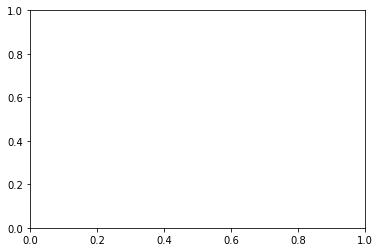

In [15]:
from sklearn.ensemble import RandomForestClassifier
def msecurve2(df):
    from sklearn.ensemble import RandomForestClassifier
    #df1 includes all features
    train, test = train_test_split(df, test_size = 0.25) #randomize, bc someitmes sorted data   
    x_train = train.drop(columns=['price_range'])
    y_train = train['price_range']
    x_test = test.drop(columns=['price_range'])
    y_test = test['price_range']
    mse = np.zeros(20)
    for i in range(1,21):   
        model = RandomForestClassifier (max_depth=i)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        msea=sklearn.metrics.mean_squared_error(y_test, y_pred)
        mse[i-1] = msea 
    return mse
#plt.plot(range(1,21),rcurve(df1),marker='+')#includes all feature
plt.plot(range(1,21),msecurve(df1))#include top 9 feautre

plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Model Selection')
plt.show()



In [ ]:
train, test = train_test_split(df11, test_size = 0.25) #randomize, bc someitmes sorted data
x_train = train.drop(columns=['price_range'])
y_train = train['price_range']
x_test = test.drop(columns=['price_range'])
y_test = test['price_range']
model = RandomForestClassifier(max_depth=5)
model.fit(x_train,y_train)
model.score(x_test,y_test) 
y_pred=model.predict(x_test)
mse=sklearn.metrics.mean_squared_error(y_test, y_pred)

print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))
print("MSE",mse)

In [ ]:
df3=pd.read_csv('zonedata.csv')
df3.head()

In [ ]:
df3['price'] = df3['price'].astype(int)
df3['price_range'] = df3['price'].apply(fix_price)
df33=df3.drop(columns=['price'])
df33.head()

In [ ]:
train, test = train_test_split(df33, test_size = 0.25) #randomize, bc someitmes sorted data
x_train = train.drop(columns=['price_range'])
y_train = train['price_range']
x_test = test.drop(columns=['price_range'])
y_test = test['price_range']
model = RandomForestClassifier(max_depth=5)
model.fit(x_train,y_train)
model.score(x_test,y_test) 
y_pred=model.predict(x_test)
mse=sklearn.metrics.mean_squared_error(y_test, y_pred)

print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))
print("MSE",mse)
